## Praca domowa 1
### Wstęp do uczenia maszynowego
### Paweł Morgen

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas_profiling import ProfileReport
data = pd.read_csv("heart_disease_weka_dataset.csv")
# data_copy = data.copy()
# def sex_map(i):
#     if(i == 0): return "female"
#     return "male"
# data_copy.sex = data_copy.sex.map(sex_map)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [48]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [64]:
# Uwaga: w kolumnach ca i thal mamy braki danych oznaczone przez -10^5
np.sum((data['ca'] < 0) | (data['thal'] < 0))
# 6 obserwacji z blisko 300.
data[(data['ca'] < 0) | (data['thal'] < 0)]
# jak widzimy, zmienna ca ma rozkład jednomodalny. Możemy zastąpić braki danych wartością 0.
# O zmiennej thal z kolei nie można tego powiedzieć. Po prostu skasujemy obserwacje brakujące.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,-100000.0,0.0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,-100000.0,3.0,0.0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,-100000.0,7.0,1.0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,-100000.0,1.0
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,-100000.0,7.0,0.0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,-100000.0,3.0,0.0


In [3]:
def ca_map(x):
    if x < 0: return 0
    return x
data.ca = data.ca.map(ca_map)
data = data[data['thal'] >= 0]

### Zmienna celu - num
0 - Przewidywana choroba serca; 1 - Przewidywany brak choroby

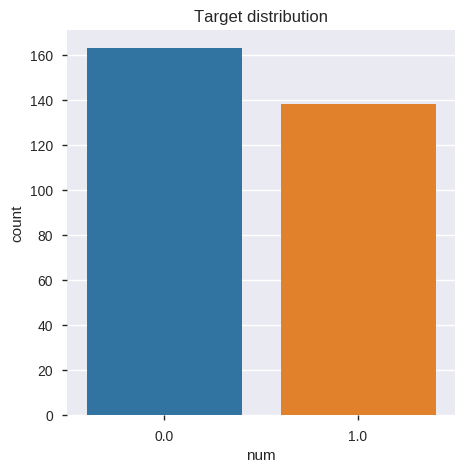

In [78]:
plt.figure(figsize = (5,5))
sns.countplot(data['num']).set_title('Target distribution')
plt.show()

### Zmienne numeryczne
 * age
 * trestbps - Ciśnienie krwi w spoczynku (mm Hg)
 * chol - cholesterol (mg/dl)
 * thalach - maksymalne tętno
 * oldpeak

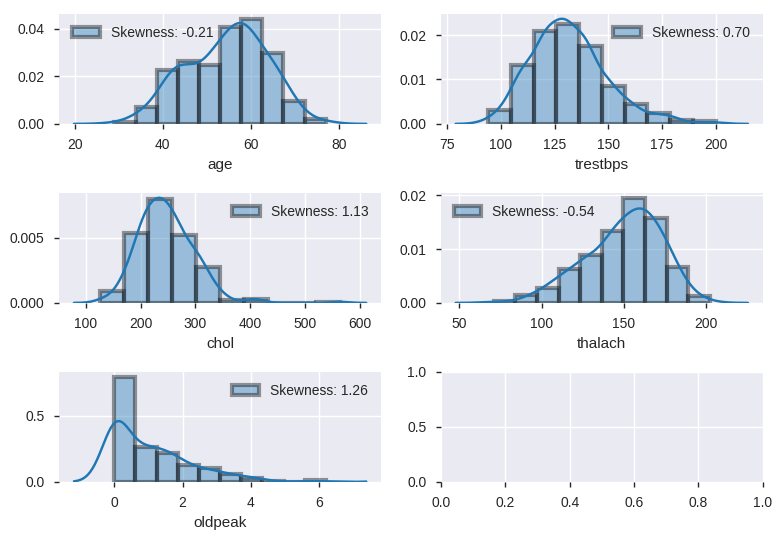

In [68]:
continuous_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(nrows=3, ncols=2)
axes = axes.flatten()
for idx, ax in enumerate(axes):
    if (idx == len(continuous_feat)): break
    plt.sca(ax)
    current_series = data[continuous_feat[idx]]
    ax = sns.distplot(current_series, bins=10, hist_kws={'edgecolor': 'black', 'linewidth': 3},
                      label=f'Skewness: {current_series.skew():.2f}')
    ax.legend()
sns.despine()
plt.tight_layout()
plt.show()

### Zmienne kategoryczne
 * sex -> 0 - female, 1 - male
 * cp - chest pain type: 1=typical angina; 2=atypical angine; 3=non-anginal pain; 4=asymptomatic
 * fbs - fasting blood sugar: 1 if > 120 mg/dl; 0 otherwise
 * restecg - resting electrocardiographic results: 0=normal; 1=having ST-T wave abnormality; 2=showing probable or definite left ventricular hypertrophy
 * exang - exercise induced angina: 1=yes; 0=no
 * slope - the slope of the peak exercise ST segment: 1=upsloping; 2=flat; 3=downsloping
 * ca - number of major vessels (0-3) colored by flourosopy
 * thal - 3=normal; 6=fixed defect; 7=reversable defect

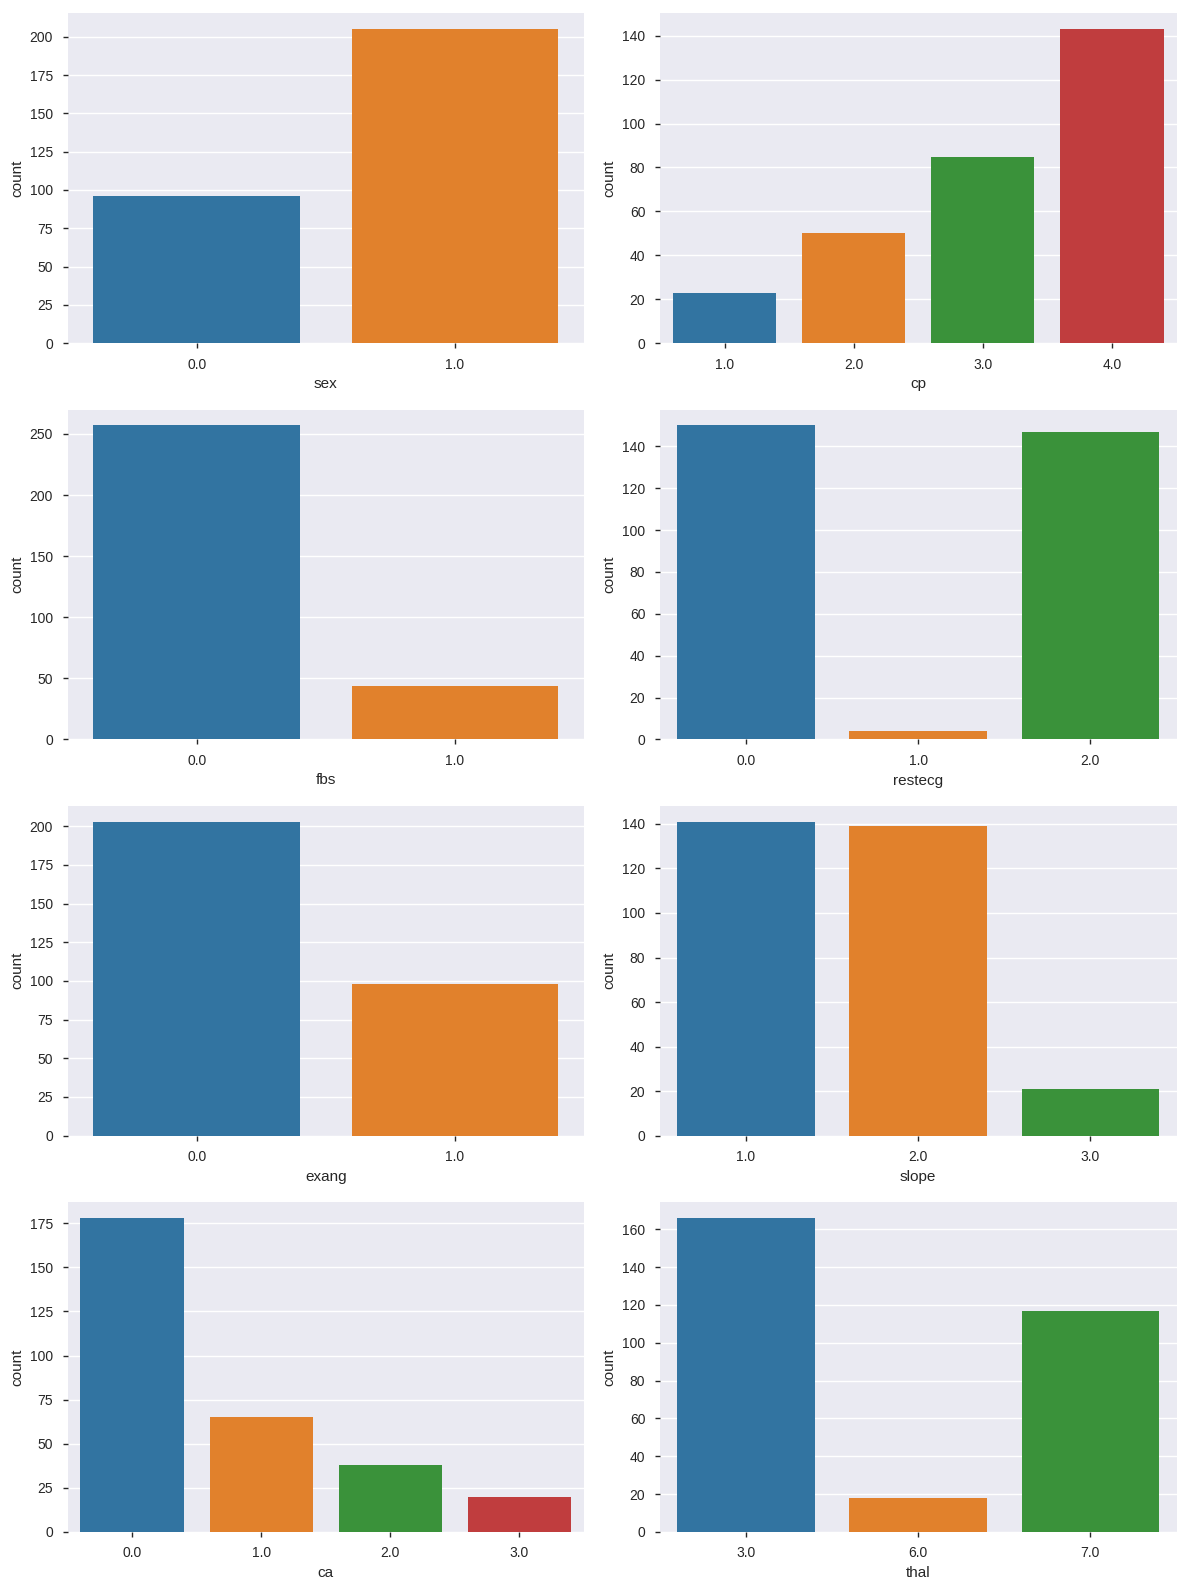

In [69]:
categorical_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    ax = sns.countplot(x = categorical_feat[idx], data=data)
sns.despine()
plt.tight_layout()
plt.show()

### Związki między zmiennymi

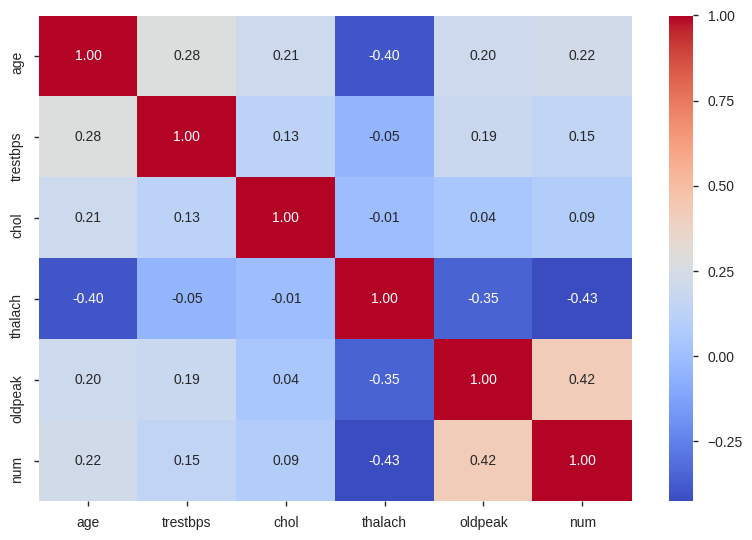

In [71]:
plt.figure()
sns.heatmap(data.loc[:,continuous_feat + ['num']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.tight_layout()
plt.show()

Mamy kilka ciekawych obserwacji.

Bardzo rzuca się w oczy kilka **ujemnych** korelacji - thalach (tętno) z oldpeak, age oraz z naszą zmienną celu.
Wynika stąd, że osoby, które potrafią osiągnąć wyższe tętno, są z reguły młodsze, szybciej im tętno spada po wysiłku oraz mają mniejsze szanse na zapadnięcie na chorobę serca. Nie jest to spore zaskoczenie.

**Pozytywna** korelacja jest między oldpeak a naszą zmienną celu - im wolniej tętno spada po wysiłku, tym większe ryzyko choroby.

Mamy również kilka innych pozytywnych korelacji o mniejszym stopniu - zmiennej age z innymi zmiennymi (poza thalach). Innymi słowy, osoby starsze częściej mają problemy z ciśnieniem krwi, cholesterolem oraz w ogóle są bardziej narażone na choroby serca. Ponownie nie jest to spore zaskoczenie.

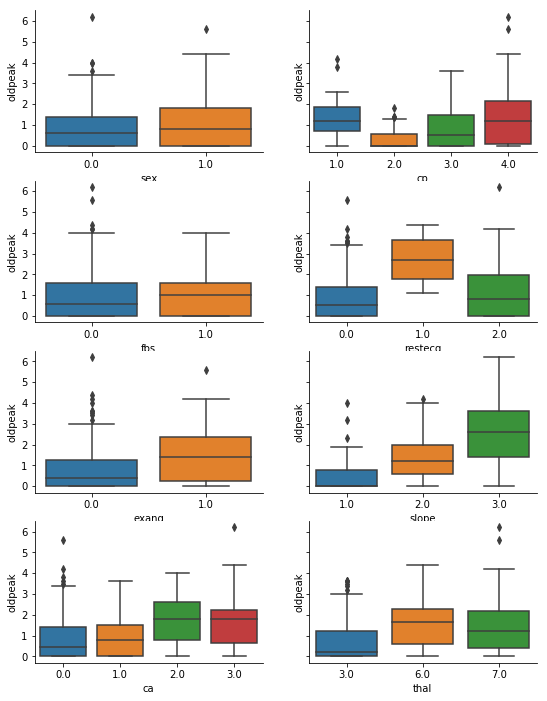

In [10]:
# Zbadajmy, jak zmienia się zmienna oldpeak (silnie skorelowana ze zmienną celu) 
# dla różnych wartości zmiennych kategorycznych.
discrete_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(9,12), sharey=True)
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    current_series = data[discrete_feat[idx]]
    ax = sns.boxplot(x = current_series, y = data['oldpeak'])
sns.despine()
# plt.tight_layout()
plt.show()

Mocno wybija się związek zmiennej `slope` ze zmienną `oldpeak`. Warto również zwrócić uwagę na zmienną `cp` oraz `restecg`.

In [70]:
profile = ProfileReport(data)
profile

Number of variables,15
Number of observations,301
Total Missing (%),0.0%
Total size in memory,35.4 KiB
Average record size in memory,120.3 B
Numeric,11
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


### ProfileReport - komentarz
Narzędzie ma swoje plusy i minusy. 

**Zalety**:
 * Automatyczna wizualizacja rozkładów oraz statystycznych parametrów zmiennych jednowymiarowych.
 * Dostarczenie informacji o wartościach brakujących (o ile nie są oznaczone jakoś inaczej)
 * Podstawowe sprawdzenie korelacji między zmiennymi
 
**Wady**:
 * Błędna interpretacja typów zmiennych (obiekty przechowywane jako zmienna typu float są z automatu traktowane jako zmienne numeryczne ciągłe)
 * Brak opcji radzenia sobie z outlierami/wykrywania outlierów
 * Brak rzetelniejszego sprawdzenia związków między zmiennymi (więcej niż 2 wymiary, związki między zmiennymi kategorycznymi)
 * Automatyczne założenie, że wartości 0 są "złe" (ma to związek z błędną interpretacją zmiennej kategorycznej jako numerycznej ciągłej)
 
 